In [1]:
# Libraries

import base64
import os
from byaldi import RAGMultiModalModel
from claudette import *
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Initializing Vision Based RAG

RAG = RAGMultiModalModel.from_pretrained("vidore/colpali-v1.2", verbose=0)

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
# Indexing the Document for vector Store 

RAG.index(
    input_path="attention.pdf",
    index_name="attention",
    store_collection_with_index=True, # set this to false if you don't want to store the base64 representation
    overwrite=True
)

overwrite is on. Deleting existing index attention to build a new one.


You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.
You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.
You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after tha

{0: 'attention.pdf'}

In [4]:
# Queries for RAG  

queries = [
    "What's the BLEU score for the transformer base model?",
    "Who are the authors of this paper?",
    "What's the model architecture?",
    "What hardware was it trained on?",
    "How Scaled Dot-Product Attention is used?",
    "Why Scaled Dot-Product Attention is used?",
    "Which optimizer is used?"
]

In [5]:
# Generating RAG results

results = RAG.search(queries, k=5)

You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.
You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after that. For this call, we will infer how many images each text has and add special tokens.
You are passing both `text` and `images` to `PaliGemmaProcessor`. The processor expects special image tokens in the text, as many tokens as there are images per each text. It is recommended to add `<image>` tokens in the very beginning of your text and `<bos>` token after tha

Query 1 : What's the BLEU score for the transformer base model?


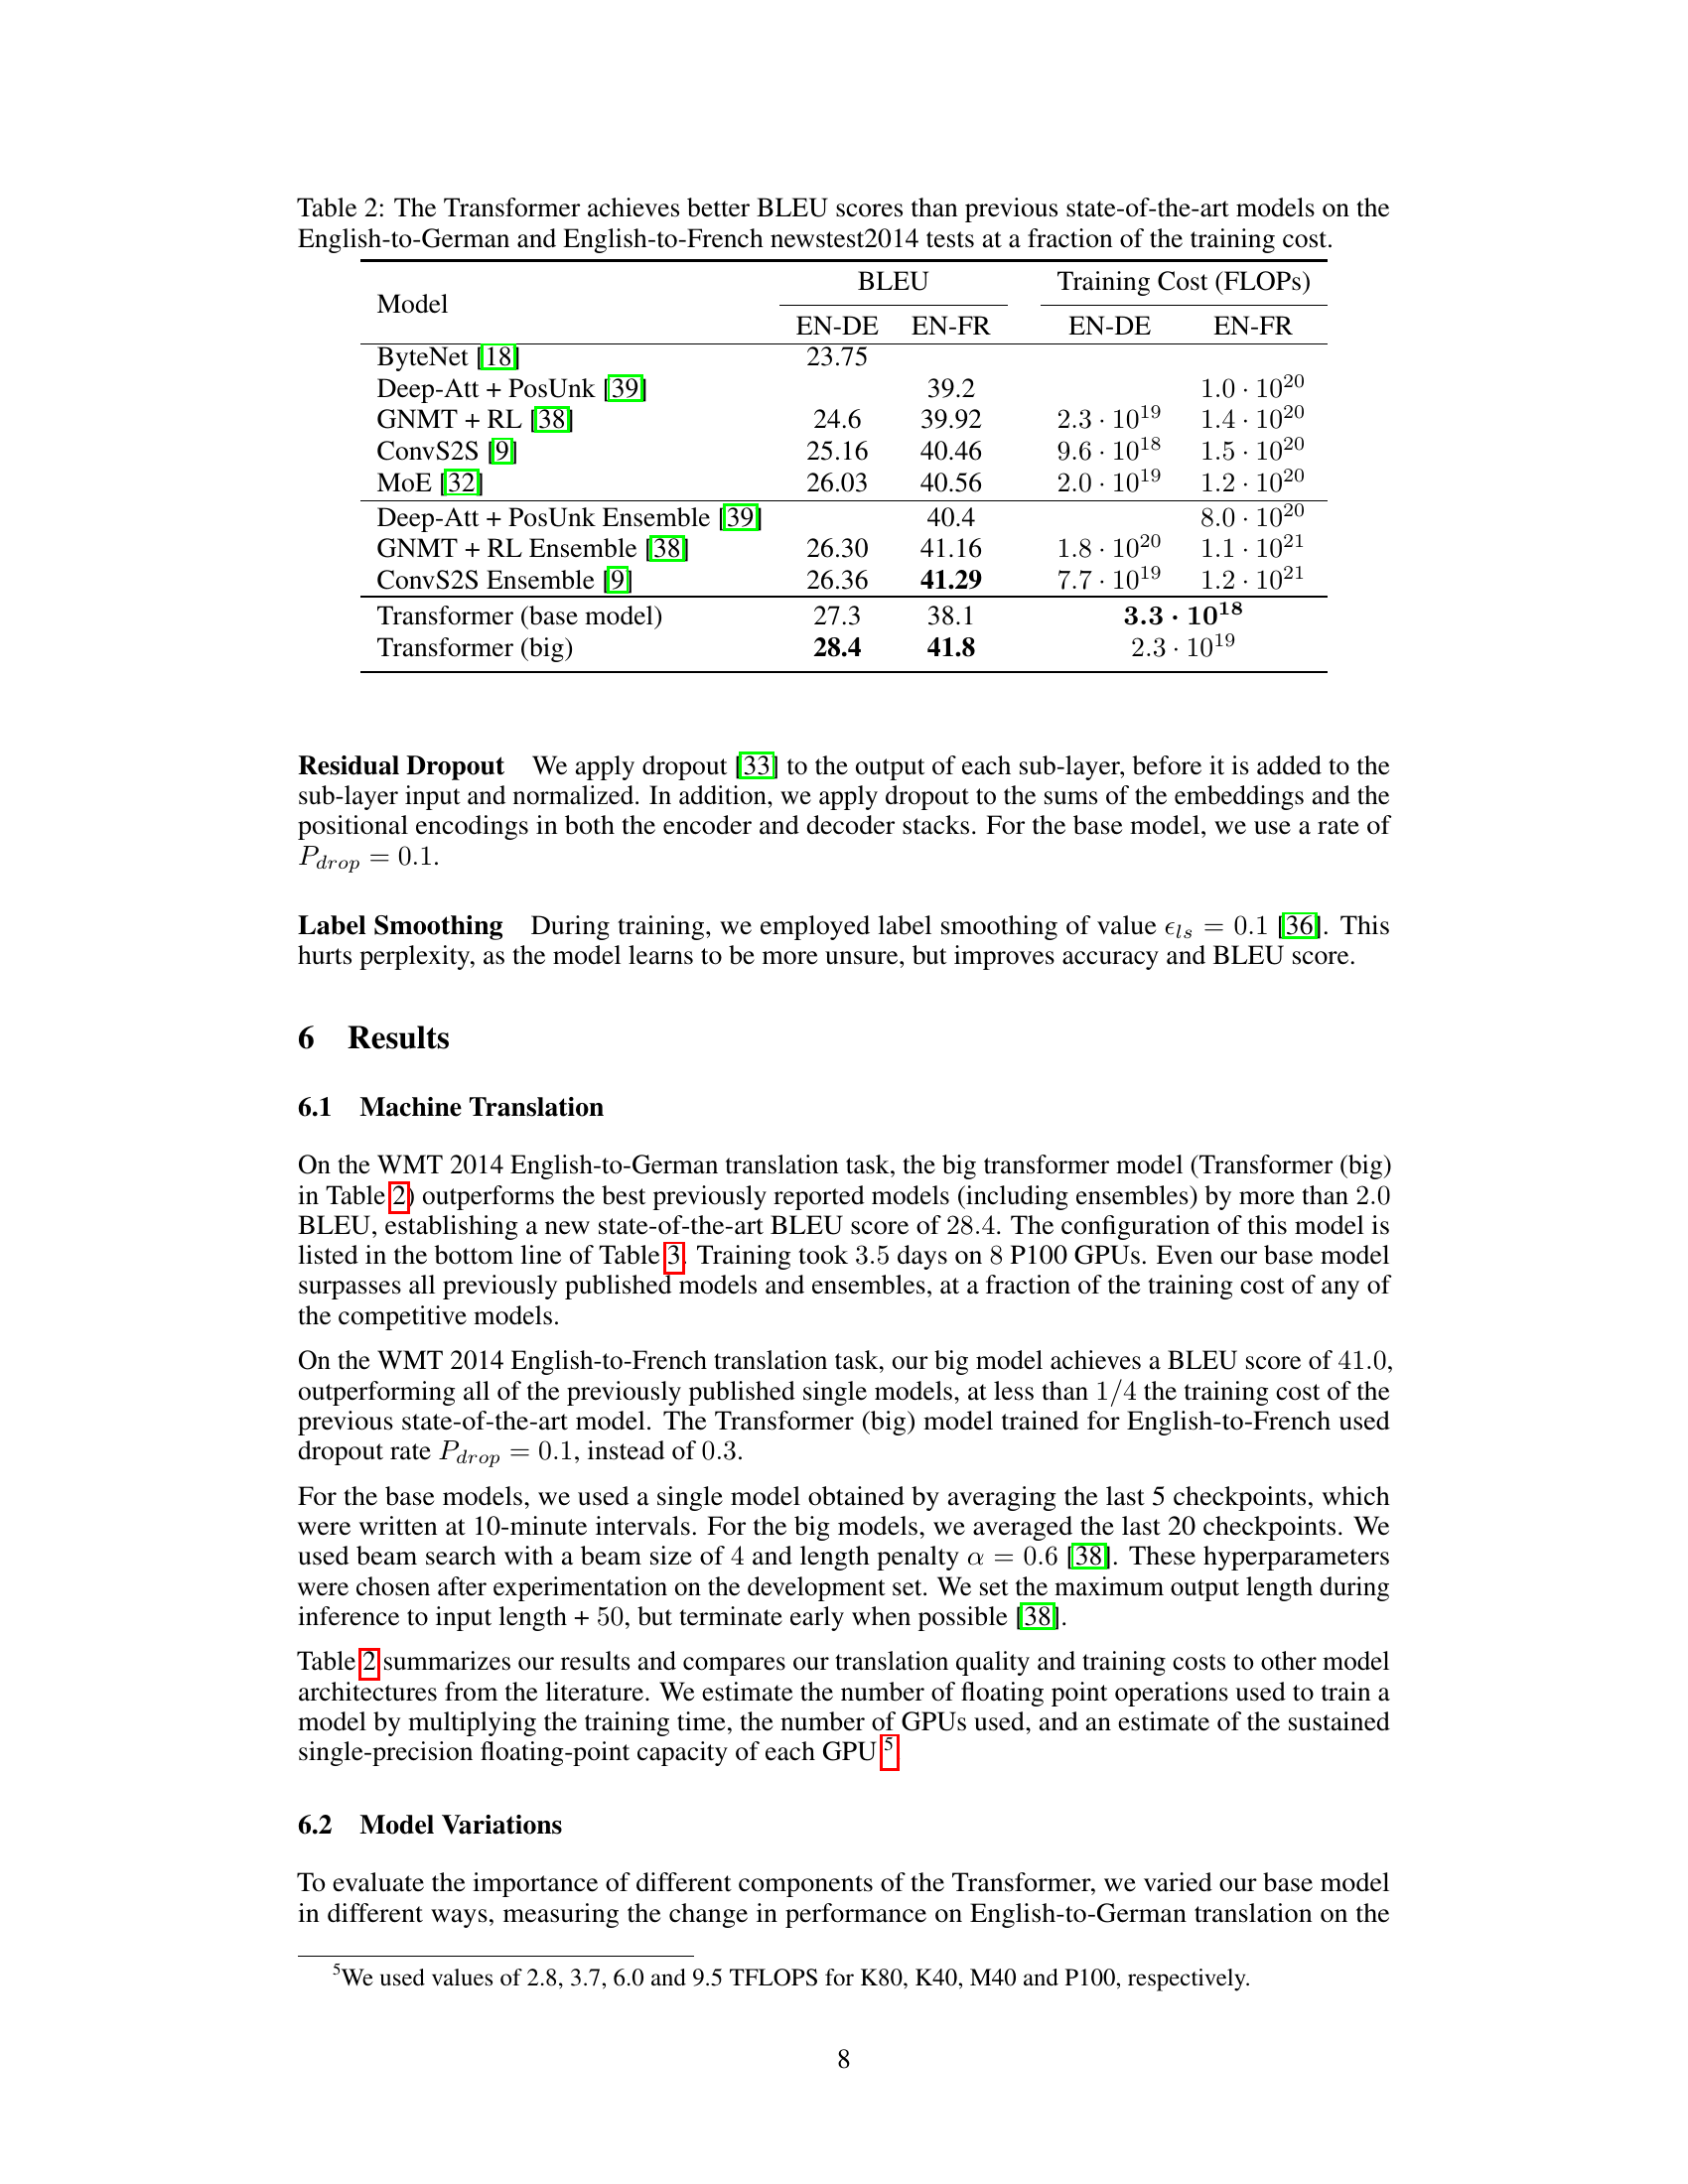



Query 2 : Who are the authors of this paper?


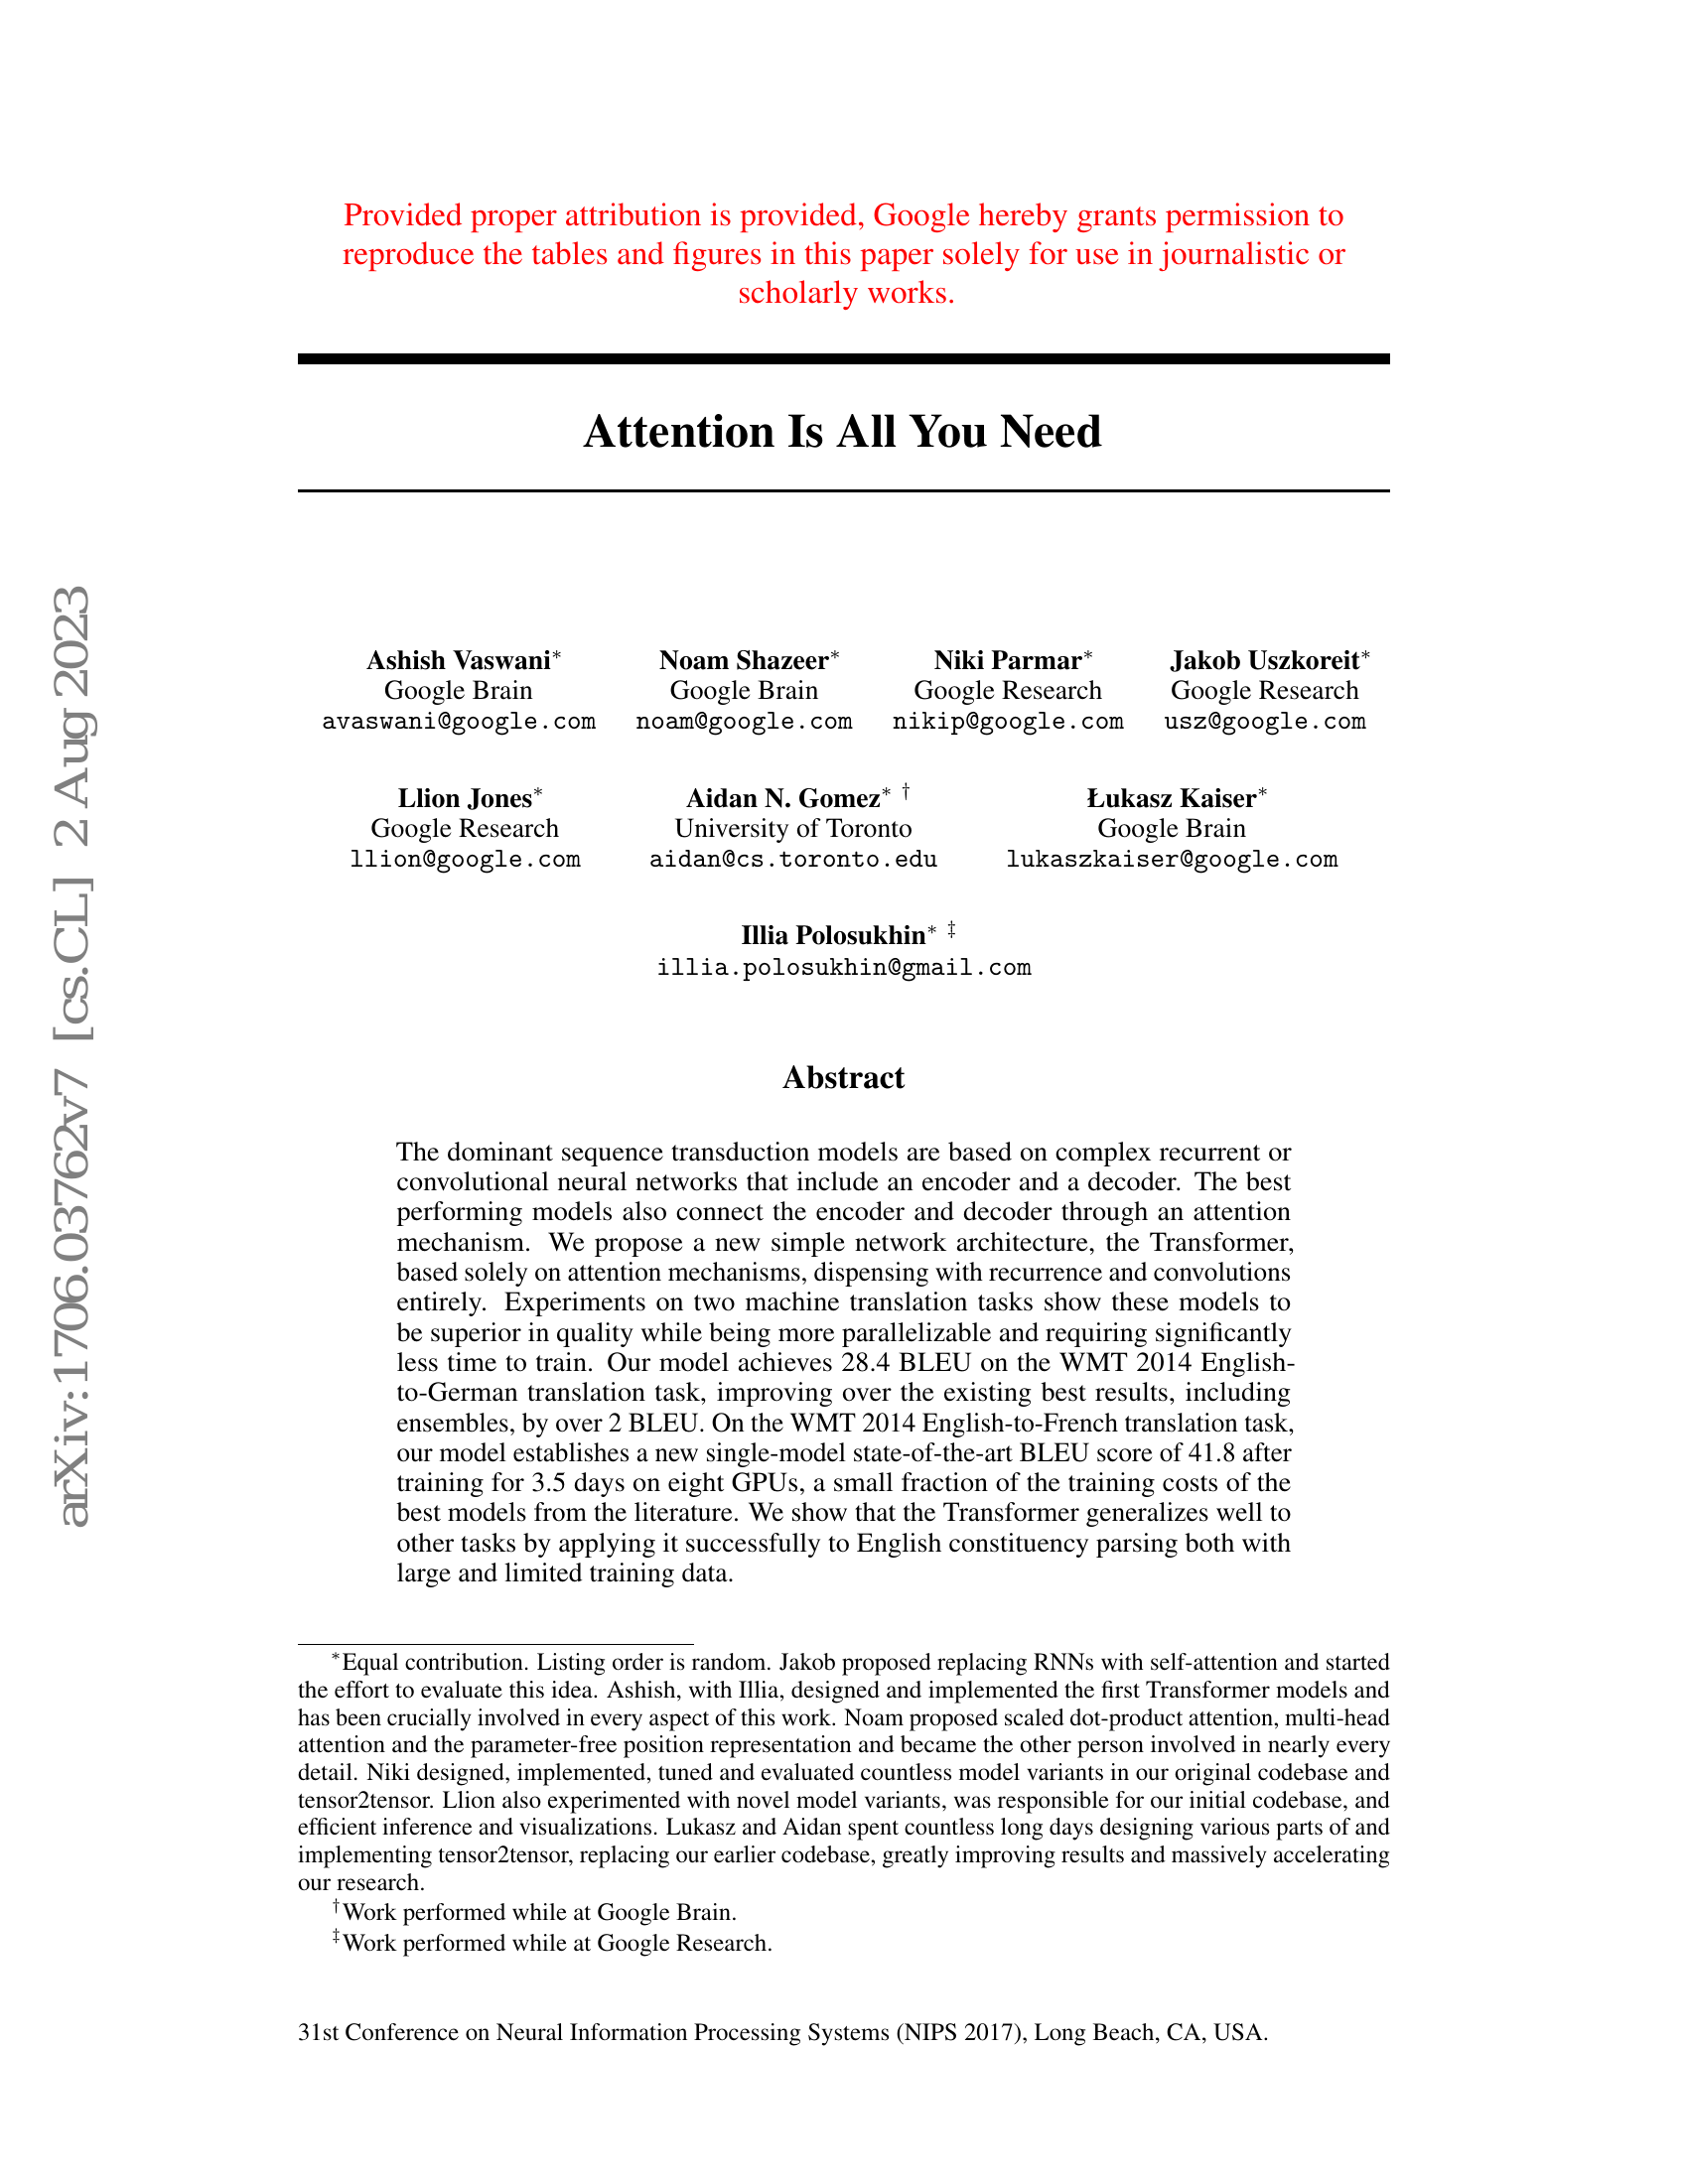



Query 3 : What's the model architecture?


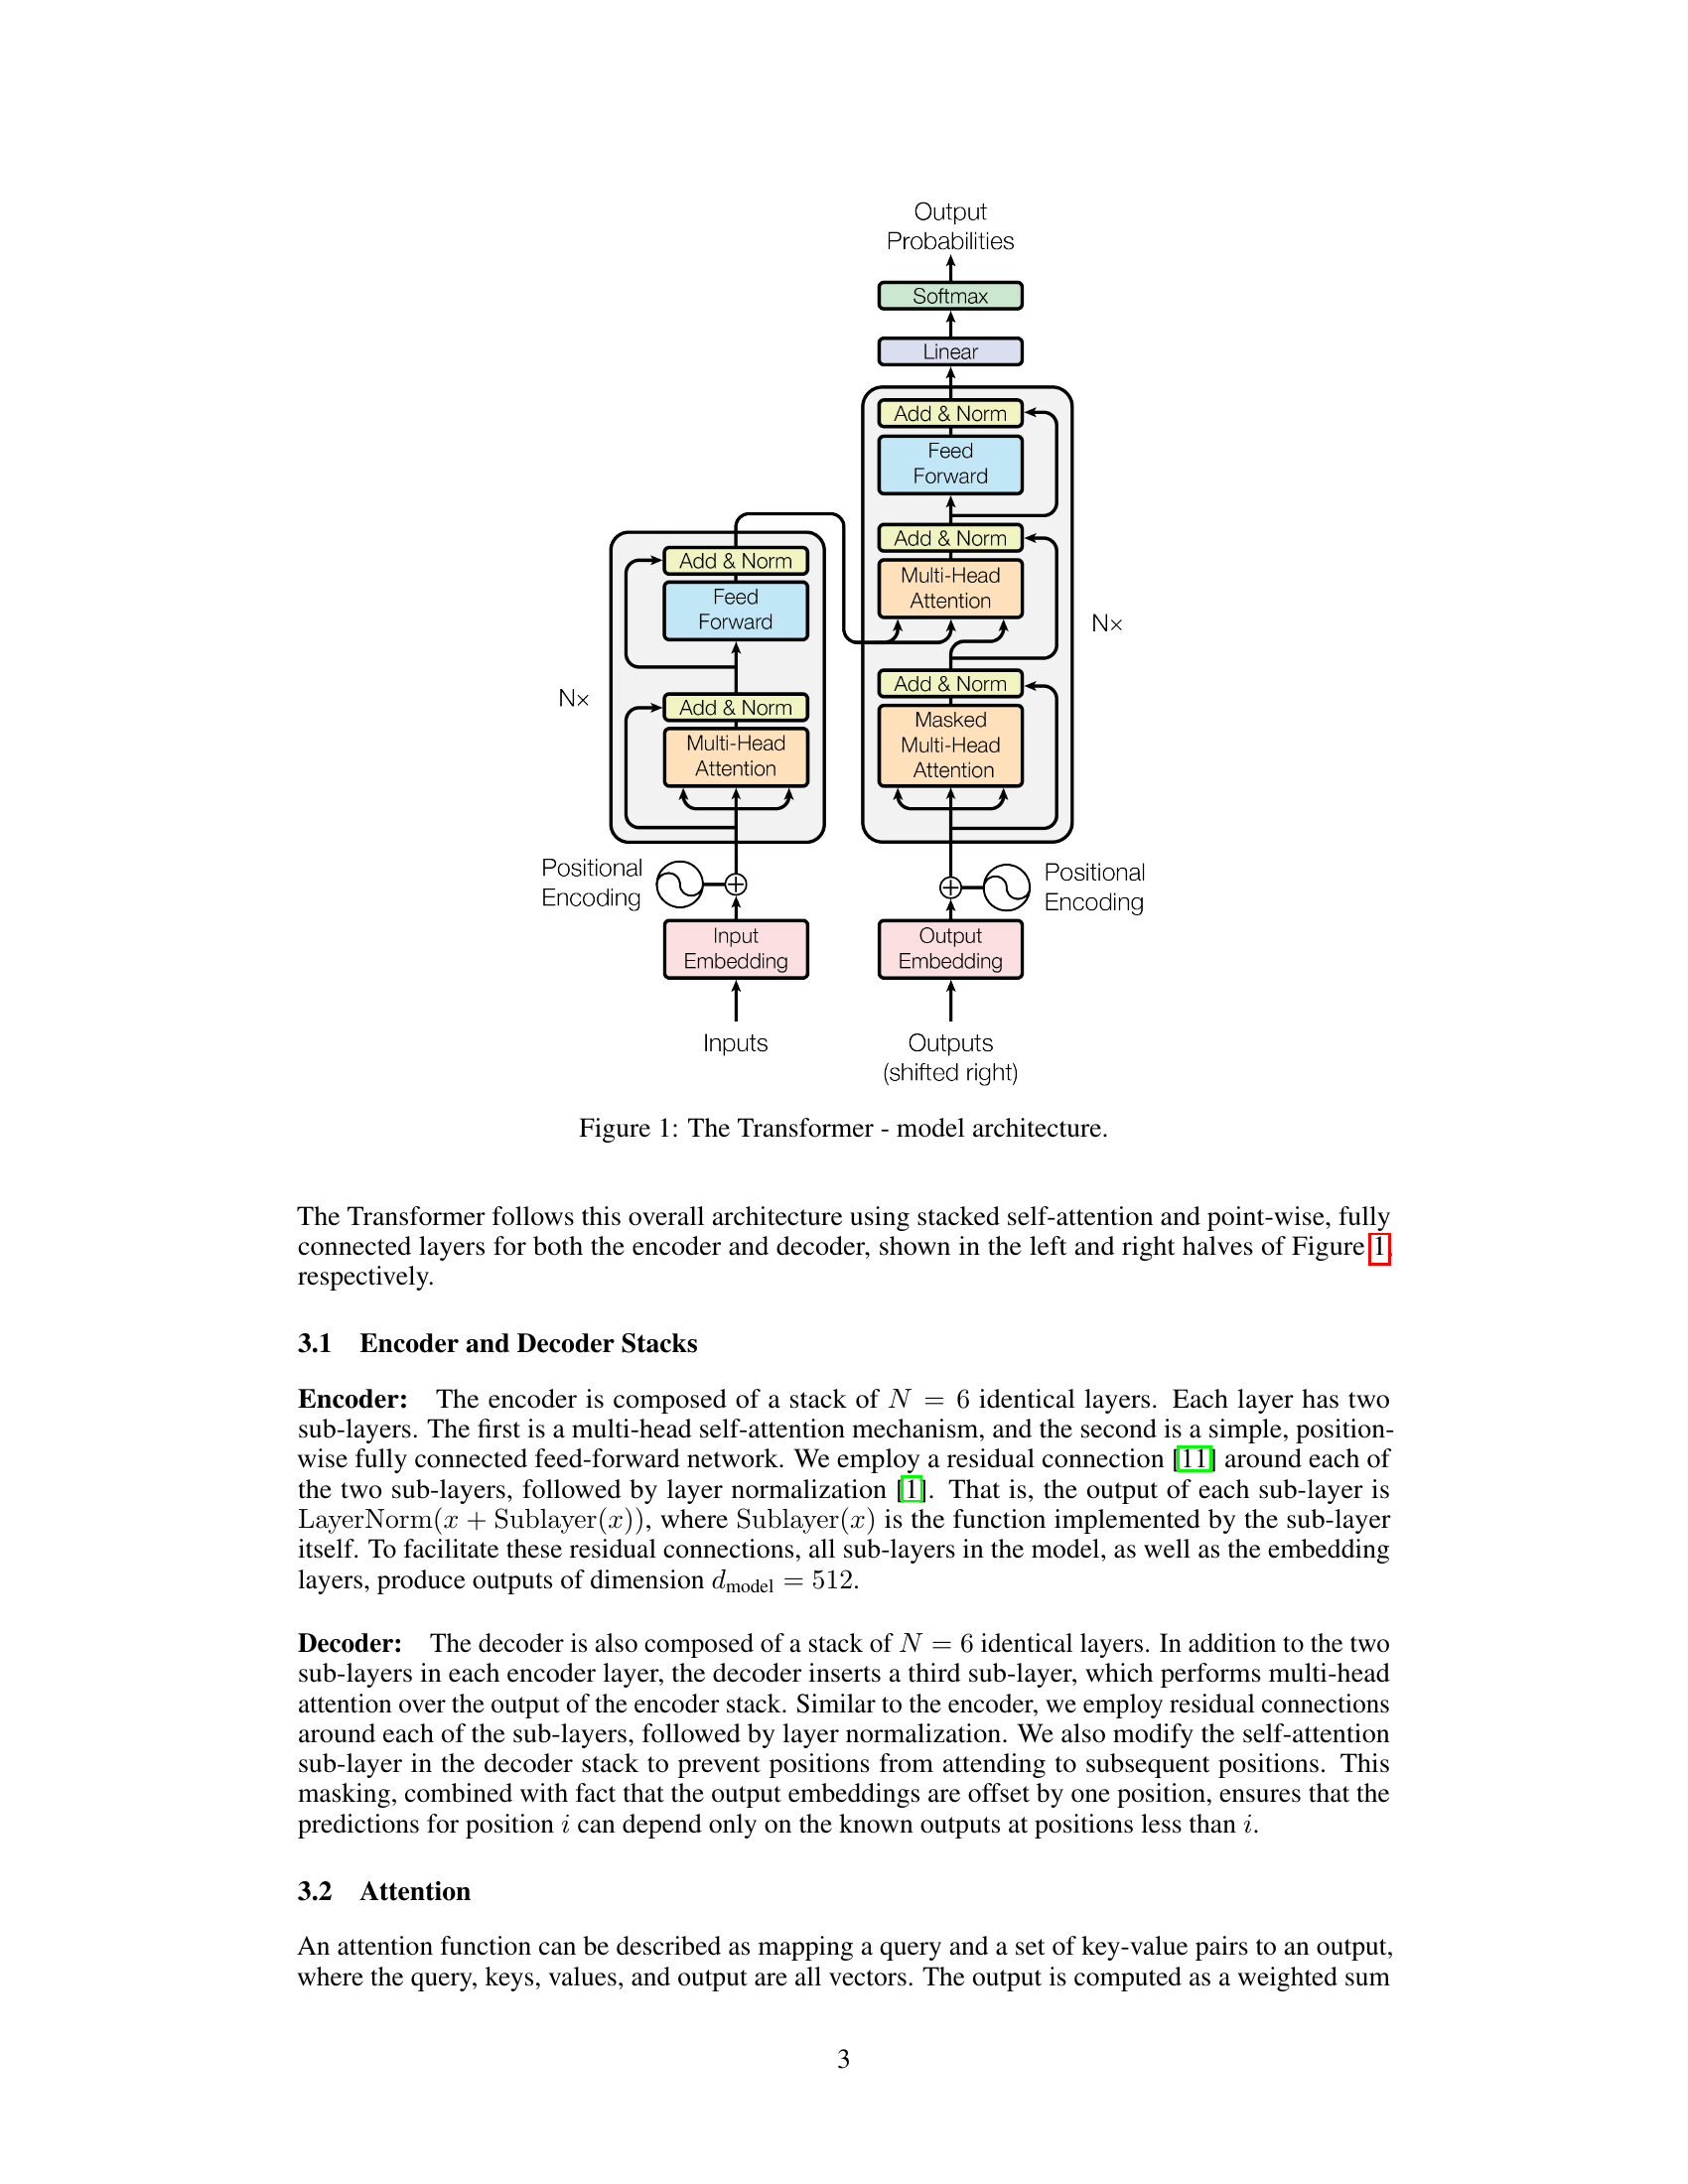



Query 4 : What hardware was it trained on?


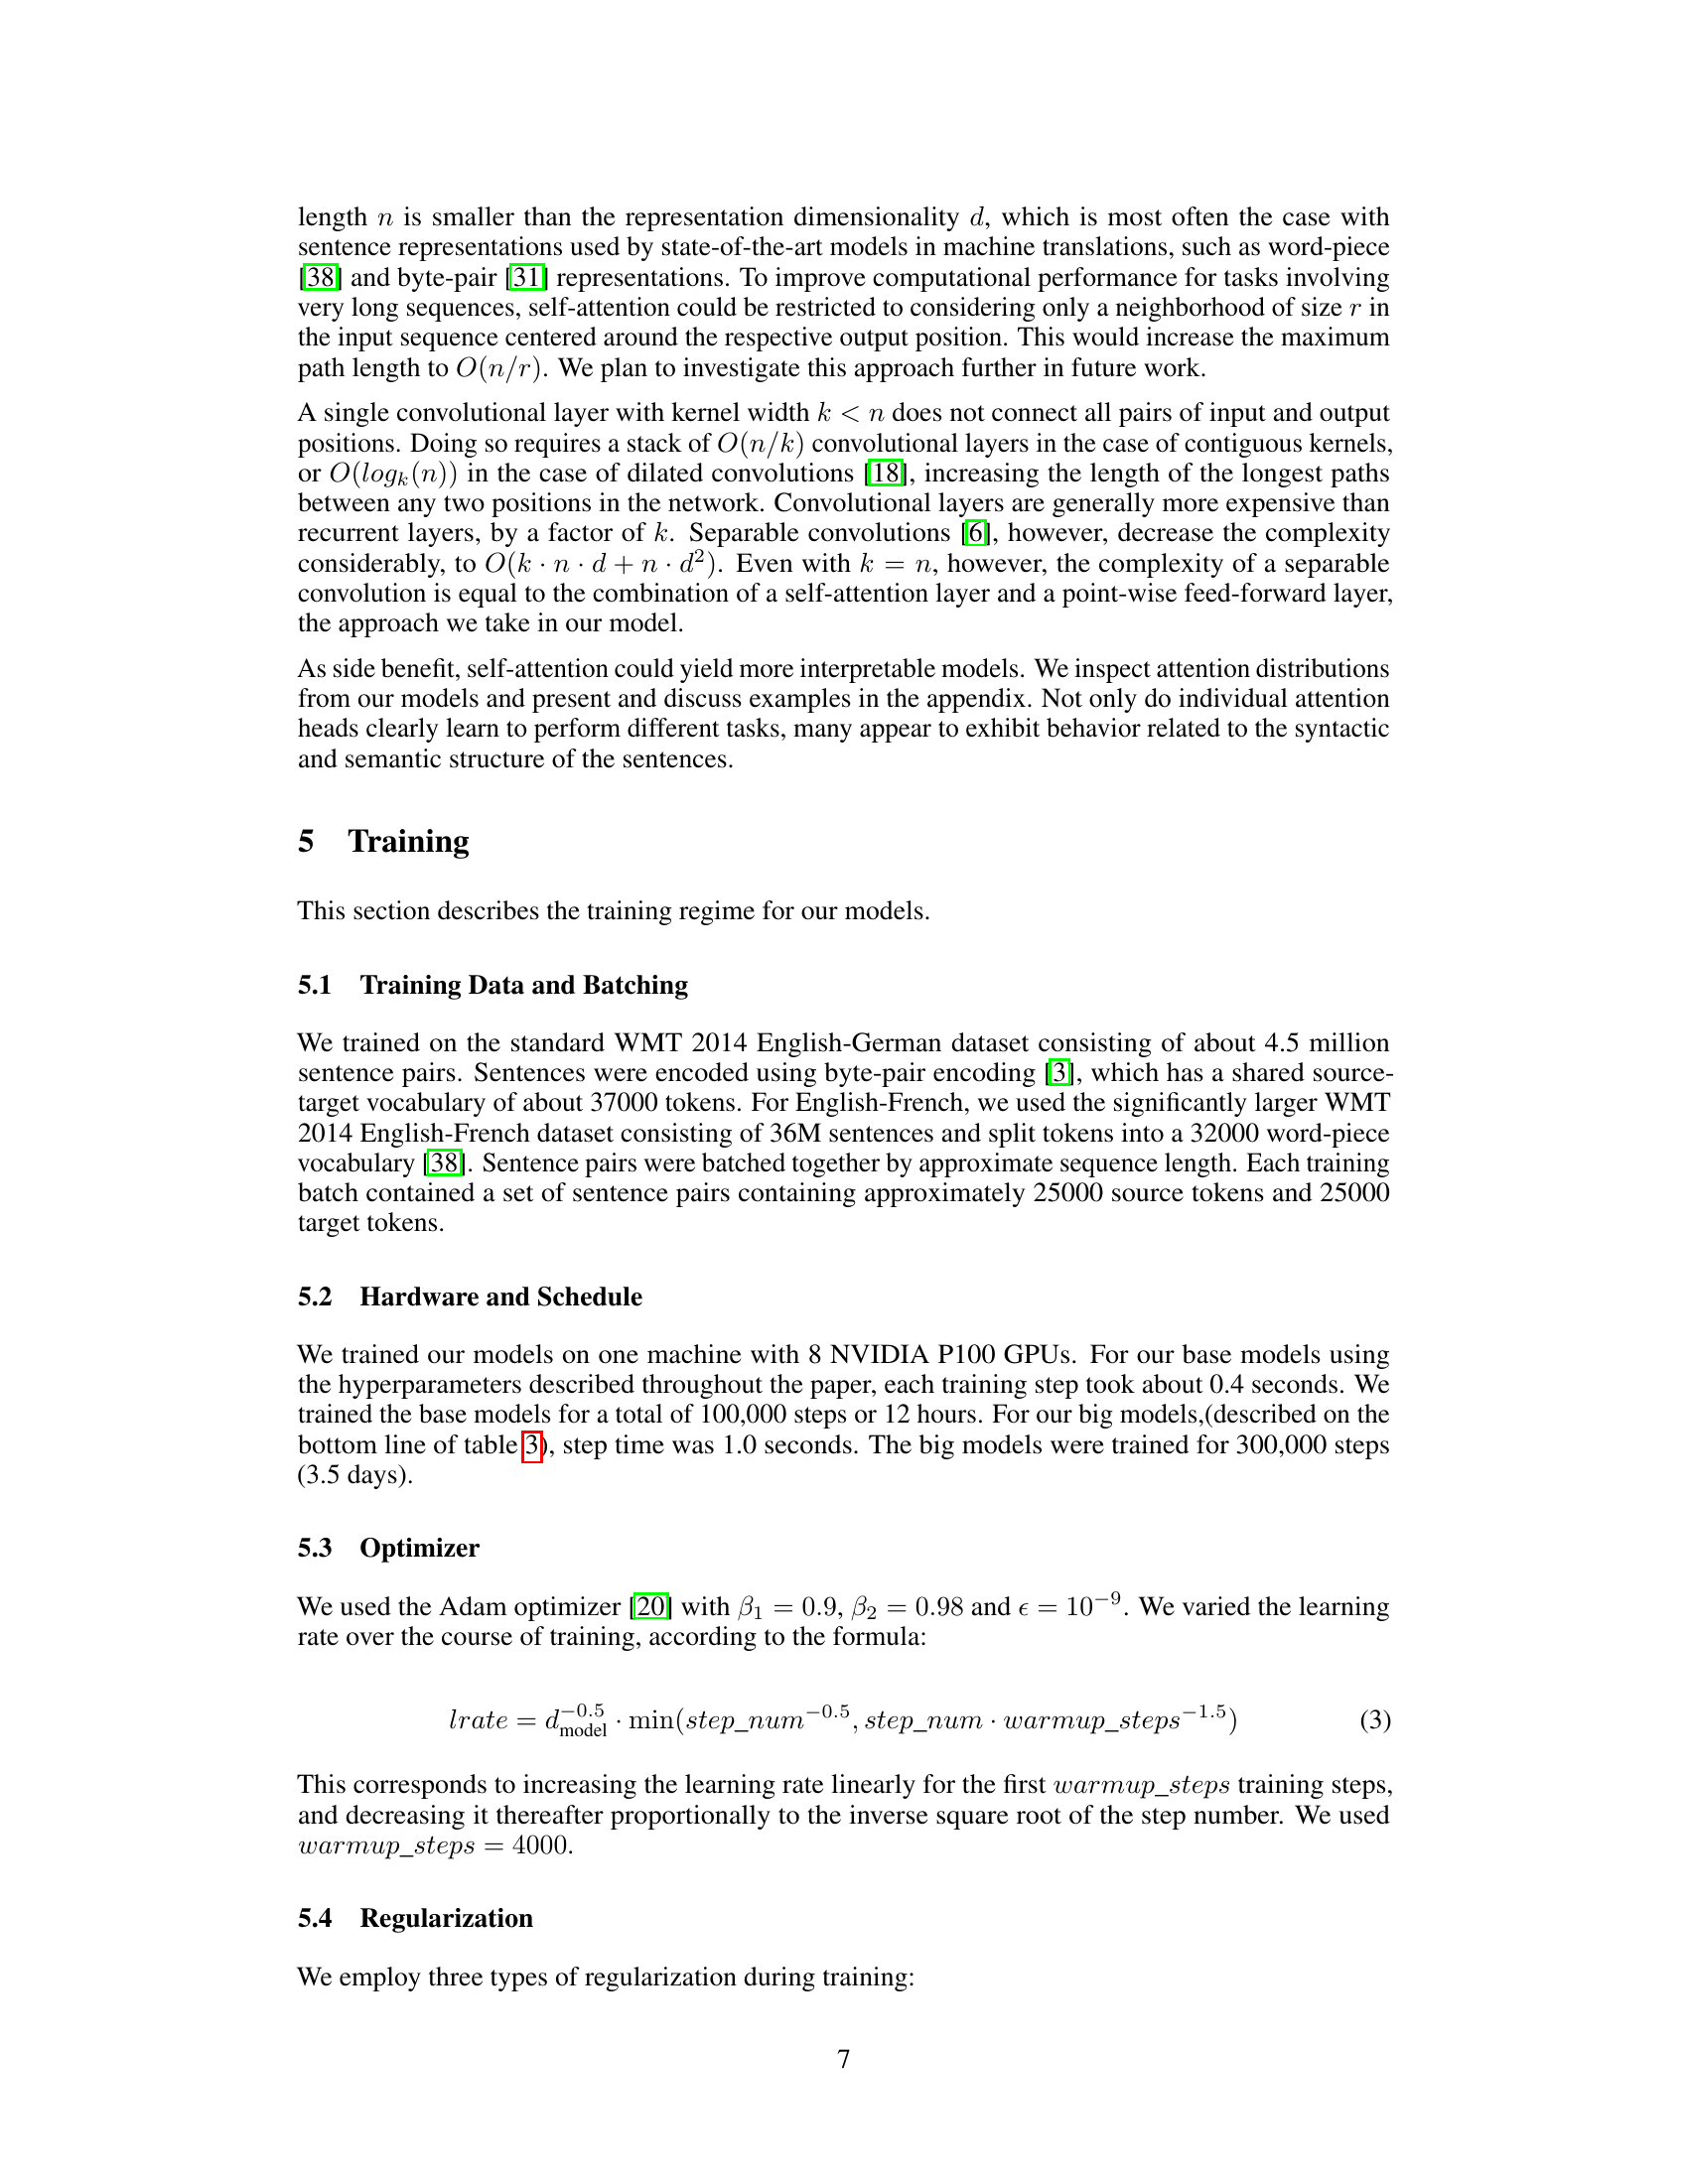



Query 5 : How Scaled Dot-Product Attention is used?


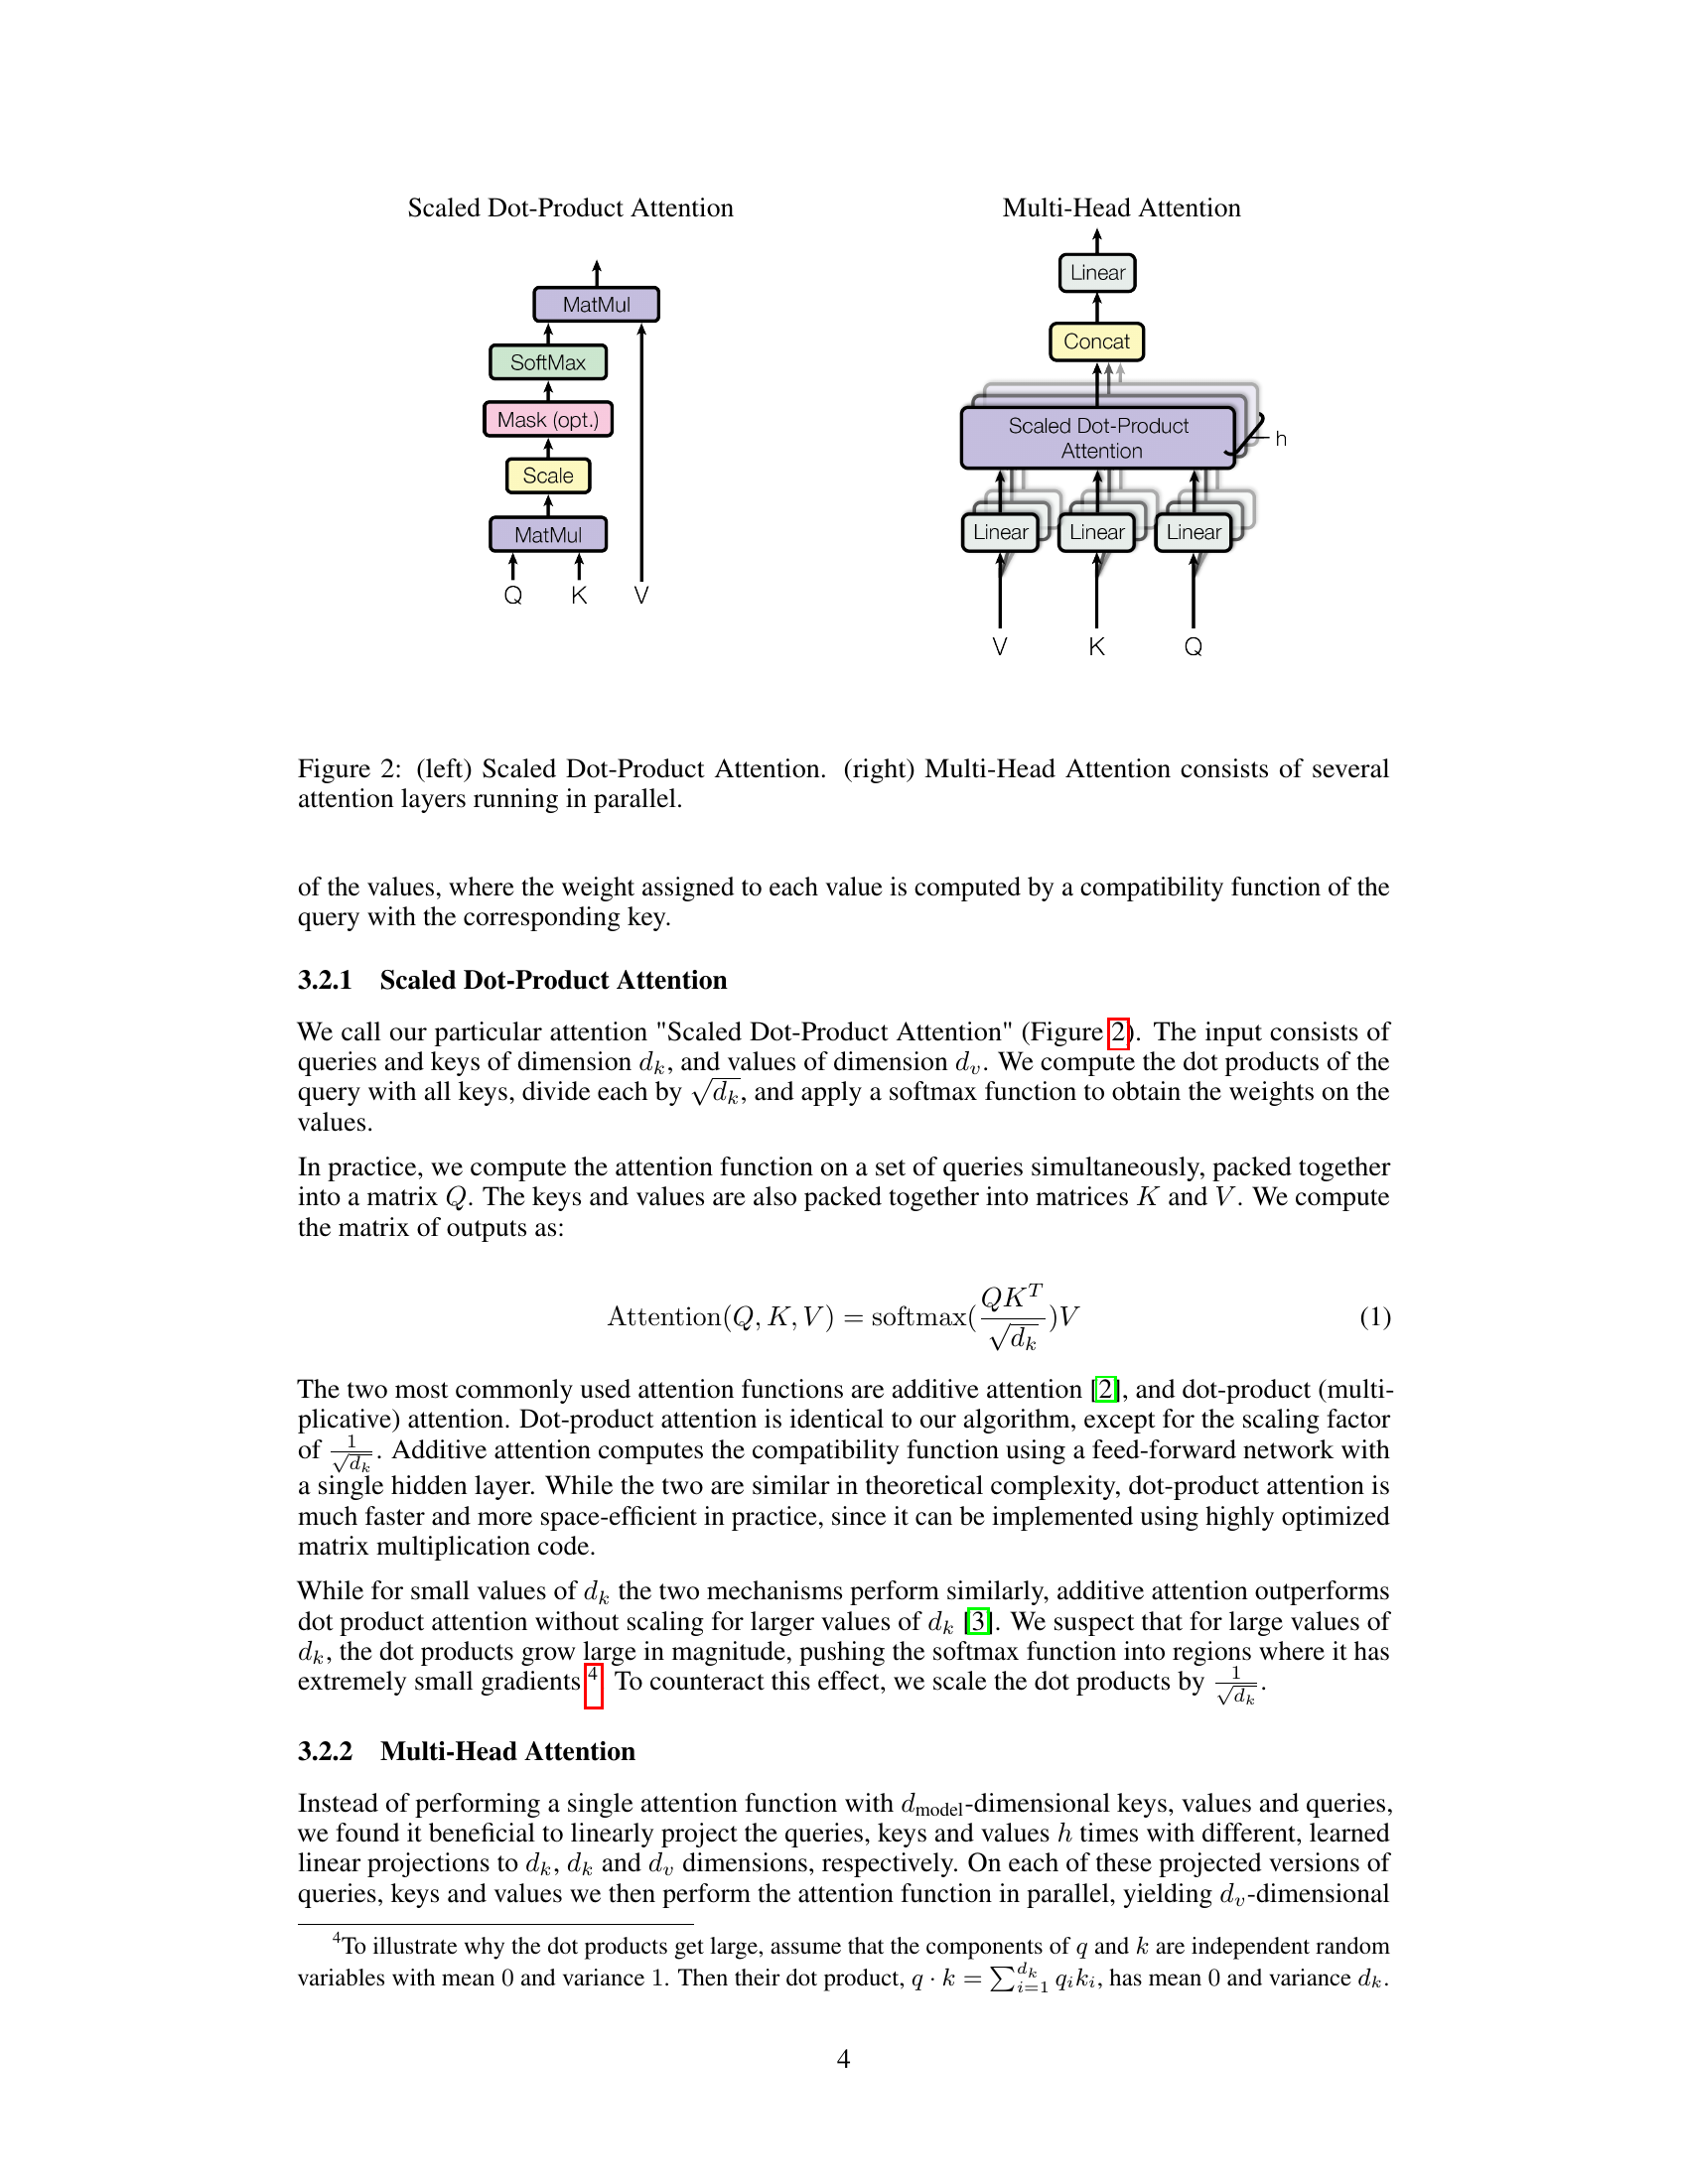



Query 6 : Why Scaled Dot-Product Attention is used?


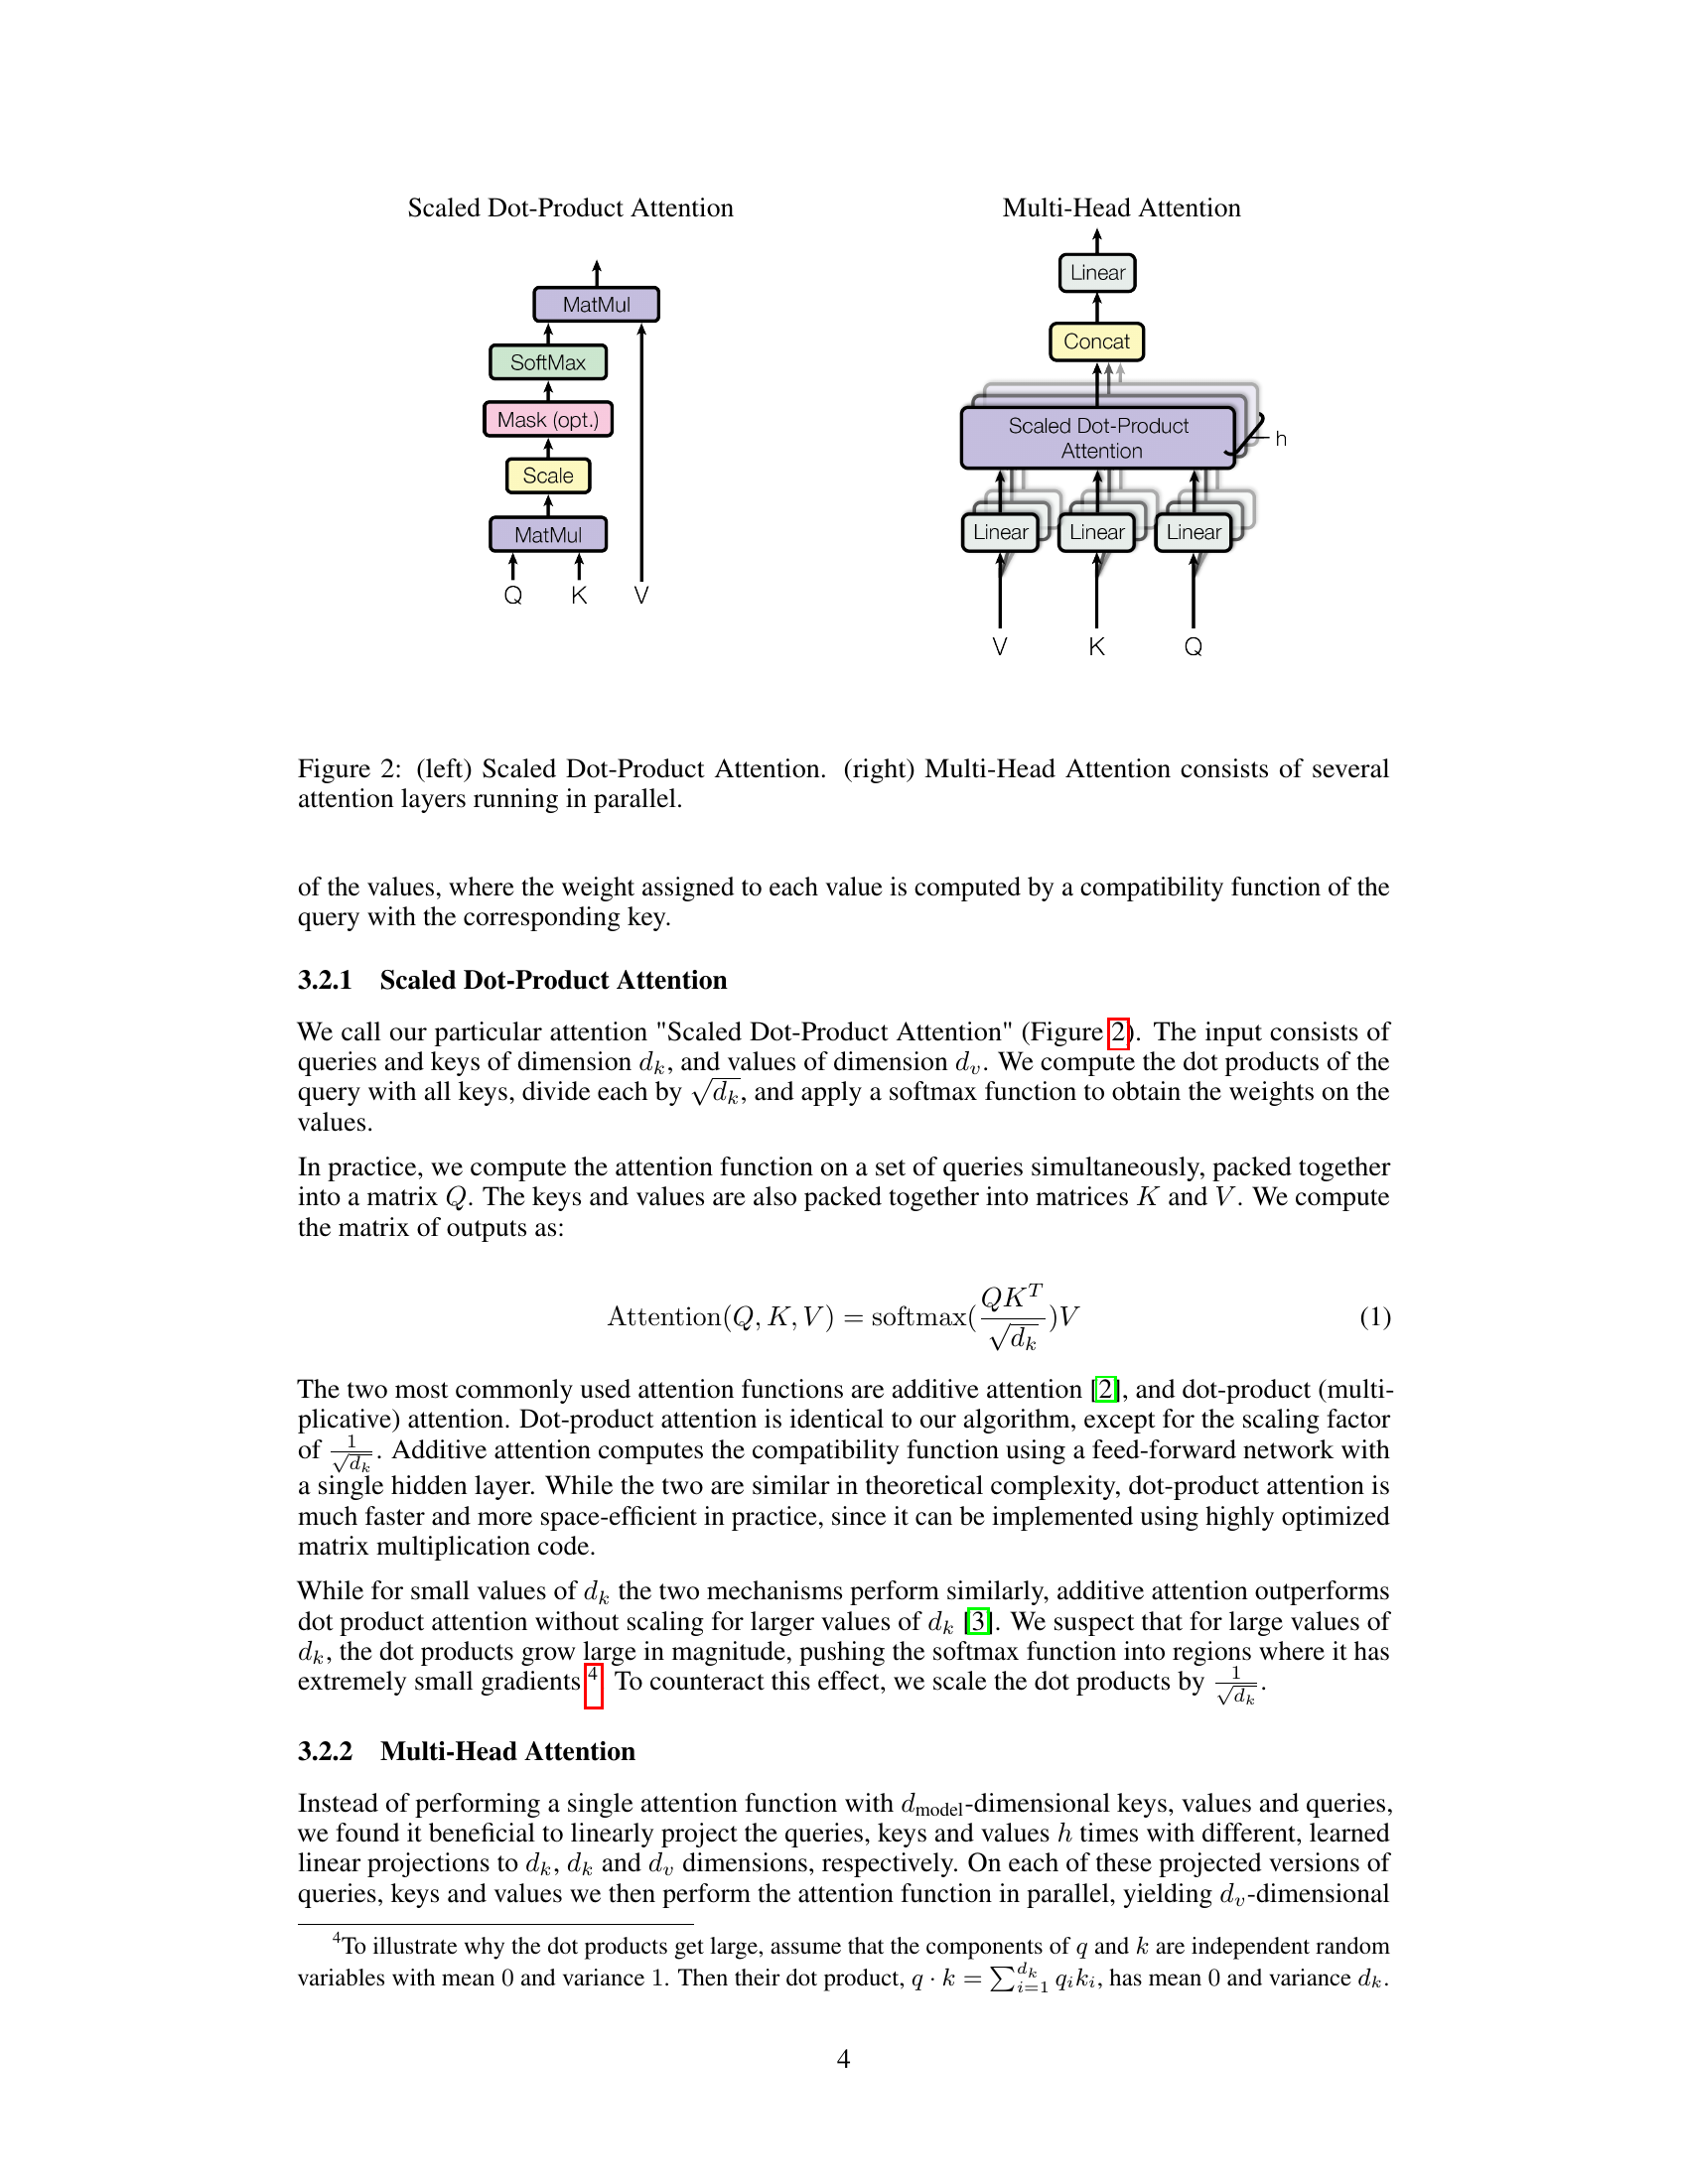



Query 7 : Which optimizer is used?


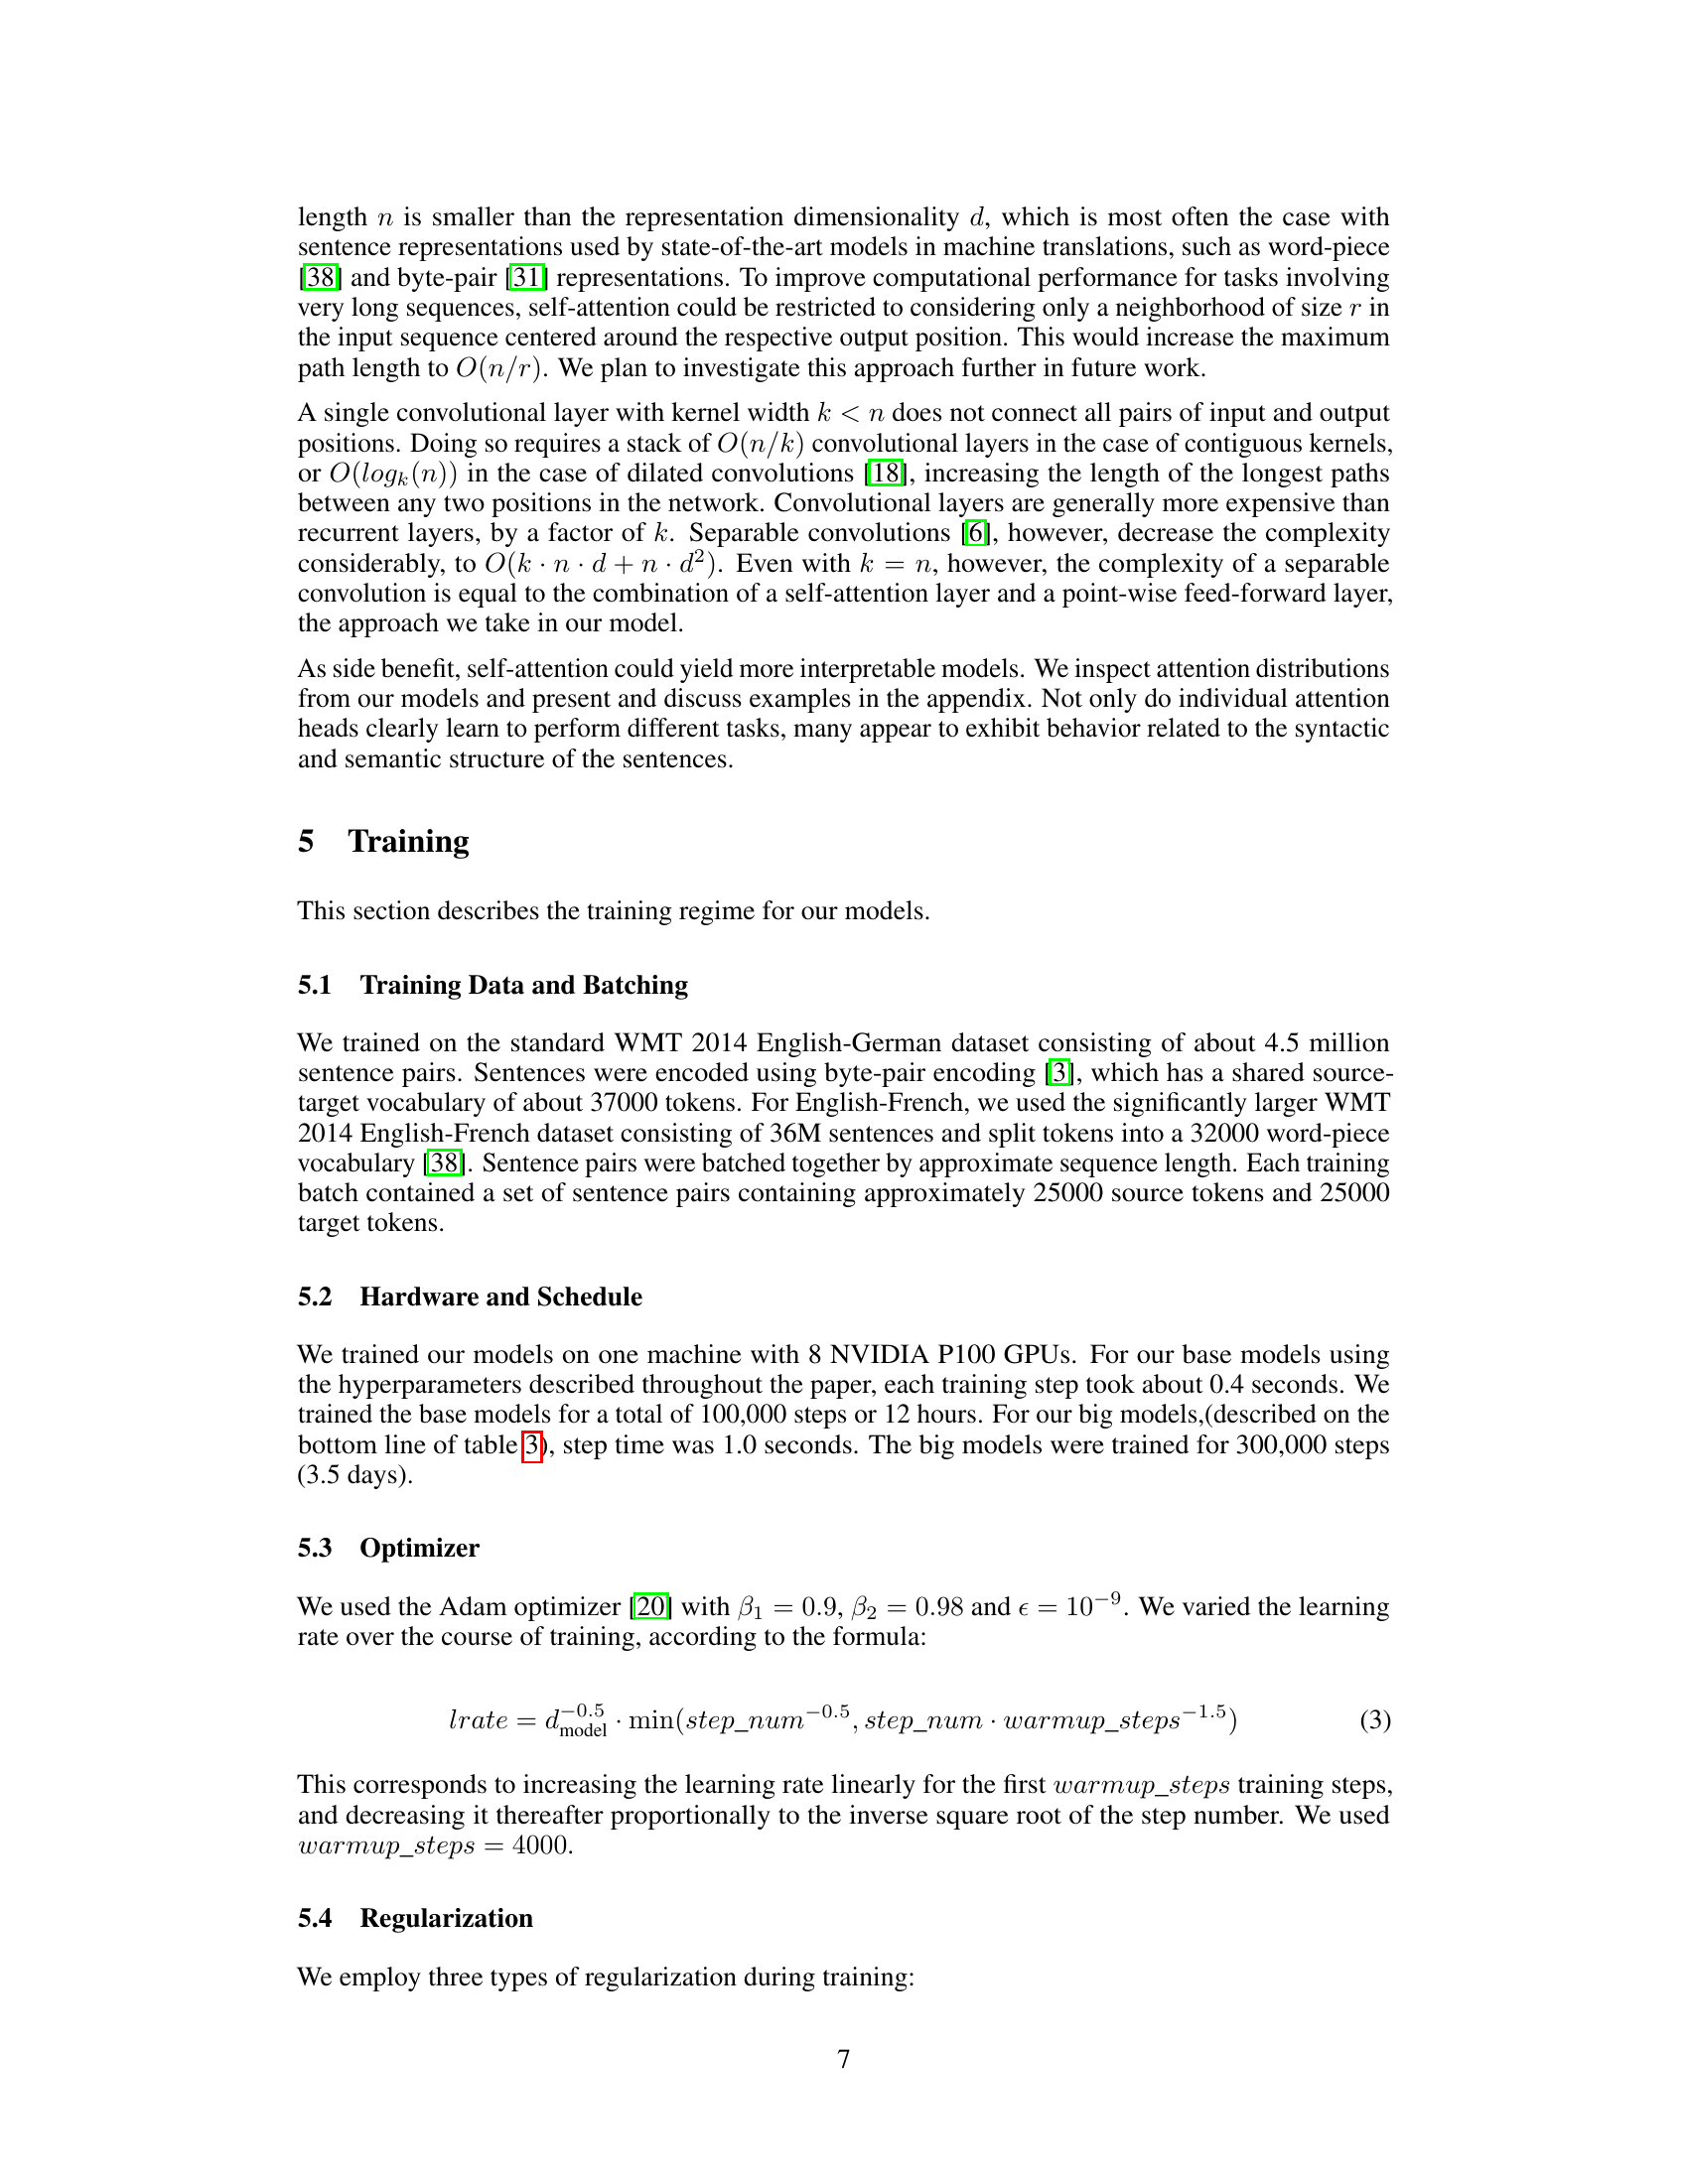

In [6]:
# Displaying Results

for idx, result in enumerate(zip(results, queries)):
    image_bytes = base64.b64decode(result[0][0].base64)    
    filename = 'image.jpg'  # I assume you have a JPG file
    with open(filename, 'wb') as f:
        f.write(image_bytes)
    print(f"Query {idx + 1} : {result[1]}")
    display(Image(filename))
    print("\n")